## Importing Necessary Libraries

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score
import plotly.express as px
from wordcloud import WordCloud
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import re

#import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from nltk.tokenize import  word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string 


## Data Loading and cleaning

In [177]:
import pandas as pd
from IPython.display import display, HTML

Hotel_Reviews = pd.read_csv('Hotel_Reviews.csv')


In [178]:
Hotel_Reviews.dropna(inplace=True)

In [179]:
Hotel_Reviews['Review_Date'] = pd.to_datetime(Hotel_Reviews.Review_Date)
Hotel_Reviews['Review_year'] =  pd.DatetimeIndex(Hotel_Reviews['Review_Date']).year 

In [180]:
Hotel_Reviews.loc[Hotel_Reviews['Negative_Review']=='No Negative','Negative_Review'] = ''
Hotel_Reviews.loc[Hotel_Reviews['Positive_Review']=='No Positive','Positive_Review'] = ''

In [181]:
Hotel_Reviews["Total_Review"] = Hotel_Reviews["Negative_Review"] + Hotel_Reviews["Positive_Review"]

In [182]:
Hotel_Reviews['Total_Review']=Hotel_Reviews.Total_Review.str.replace('[^a-zA-Z]', ' ')

In [183]:
# Remove punctuation 
Hotel_Reviews['Total_Review'] = Hotel_Reviews['Total_Review'].str.replace('[^\w\s]','')

In [184]:
Hotel_Reviews['Total_Review']=Hotel_Reviews['Total_Review'].str.lower()

In [185]:
Hotel_Reviews['Total_Review'] = Hotel_Reviews['Total_Review'].astype(str)

In [186]:
Hotel_Reviews.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Review_year
count,512470.000000,512470.000000,512470.000000,512470.000000,512470.000000,512470.000000,512470.000000,512470.000000,512470.000000,512470.000000
mean,500.118391,8.397934,18.541864,2747.504902,17.765052,7.152272,8.395594,49.442439,2.823803,2016.121031
std,501.419262,0.549133,29.693695,2322.698454,21.789025,11.028943,1.638170,3.466325,4.579425,0.687526
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758,2015.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372,2016.000000
50%,343.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607,2016.000000
75%,666.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000,51.516288,4.834443,2017.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233,2017.000000


In [187]:
Hotel_Reviews.nunique()

Hotel_Address                                   1476
Additional_Number_of_Scoring                     479
Review_Date                                      731
Average_Score                                     34
Hotel_Name                                      1475
Reviewer_Nationality                             227
Negative_Review                               327927
Review_Total_Negative_Word_Counts                402
Total_Number_of_Reviews                         1132
Positive_Review                               409941
Review_Total_Positive_Word_Counts                365
Total_Number_of_Reviews_Reviewer_Has_Given       197
Reviewer_Score                                    37
Tags                                           54934
days_since_review                                731
lat                                             1472
lng                                             1472
Review_year                                        3
Total_Review                                  

In [188]:
# Split the address and extract the country
Hotel_Reviews['hotel_country'] = Hotel_Reviews.Hotel_Address.apply(lambda x: x.split(' ')[-1])

In [189]:
Hotel_Reviews

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_year,Total_Review,hotel_country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,2017,i am so angry that i made this post available...,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,2017,no real complaints the hotel was great great ...,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,2017,rooms are nice but for elderly a bit difficul...,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,2017,my room was dirty and i was afraid to walk ba...,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,2017,you when i booked with your company on line y...,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-30,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,2015,no trolly or staff to help you take the lugga...,Austria
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-22,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,2015,the hotel looks like but surely not brea...,Austria
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-19,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,2015,the ac was useless it was a hot week in vienn...,Austria
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-17,8.1,Atlantis Hotel Vienna,Mexico,,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,2015,the rooms are enormous and really comfortable...,Austria


## Feature Engineering

Performing sentiment analysis on Total_reviews which is a combination of positive and negative reviews and collect sentiment scores using the Vader model.
Then use the scores generated from Vader as our features and Reviewer_score as Target variable.

## Vader Sentiment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.
Since this does not consider relationship between words, this is not the most optimized approach

In [195]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [196]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(review_df.Total_Review.reset_index().iterrows(), total=len(review_df)):
    text = row['Total_Review']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/512470 [00:00<?, ?it/s]

In [197]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index()
vaders = vaders.merge(review_df.reset_index(), how='left')

In [198]:
vaders.head()

,index,neg,neu,pos,compound,Hotel_Name,hotel_country,Total_Review,Reviewer_Score,Average_Score,Reviewer_Nationality,Total_Number_of_Reviews_Reviewer_Has_Given,Tags
0,0,0.085,0.857,0.059,-0.8589,Hotel Arena,Netherlands,i am so angry that i made this post available...,2.9,7.7,Russia,7,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,1,0.058,0.757,0.186,0.9494,Hotel Arena,Netherlands,no real complaints the hotel was great great ...,7.5,7.7,Ireland,7,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,2,0.111,0.671,0.218,0.8402,Hotel Arena,Netherlands,rooms are nice but for elderly a bit difficul...,7.1,7.7,Australia,9,"[' Leisure trip ', ' Family with young childre..."
3,3,0.099,0.754,0.147,0.9355,Hotel Arena,Netherlands,my room was dirty and i was afraid to walk ba...,3.8,7.7,United Kingdom,1,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,4,0.058,0.861,0.081,0.5263,Hotel Arena,Netherlands,you when i booked with your company on line y...,6.7,7.7,New Zealand,3,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


## Model fitting

We have performed sentiment analysis, now we will use Decision Tree Regressor, Random Forest Regressor and Adaboost Model to predict Reviewer Score.

In [199]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [200]:
X = vaders[['neg','neu','pos','compound']]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    vaders['Reviewer_Score'], 
    test_size=0.25, 
    random_state=42
  )

In [209]:
# Fit a Random Forest regressor

rf_model = RandomForestRegressor(random_state=5220,n_estimators = 100)
rf_model.fit(X_train,y_train)

# Make predictions with the Random Forest regressor
rf_pred = rf_model.predict(X_test)

# Calculate metrics for the Random Forest regressor
rfmse = mean_squared_error(y_test, rf_pred)
print("Random Forest MSE:", rfmse)

Random Forest MSE: 2.0228066866555814


In [210]:
# Fit an AdaBoost regressor
ab_model = AdaBoostRegressor(n_estimators=100,random_state = 5220)
ab_model.fit(X_train,y_train)

# Make predictions with the AdaBoost regressor
adaboost_pred = ab_model.predict(X_test)

# Calculate metrics for the AdaBoost regressor

abmse = mean_squared_error(y_test, adaboost_pred)
print("Adaboost MSE:", abmse)

Adaboost MSE: 2.100317199537433


In [211]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

# Make predictions with the Decision Tree regressor
dt_pred = dt_model.predict(X_test)

# Calculate metrics for the Decision Tree regressor
dtmse = mean_squared_error(y_test, dt_pred)
print("Decision Tree MSE:",dtmse)

Decision Tree MSE: 2.8544843663986983


In [212]:
print("Decision Tree MSE:", dtmse)
print("Random Forest MSE:", rfmse)
print("Adaboost MSE:", abmse)

Decision Tree MSE: 2.8544843663986983
Random Forest MSE: 2.0228066866555814
Adaboost MSE: 2.100317199537433


[0.14869525 0.12758611 0.37887501 0.34484362]


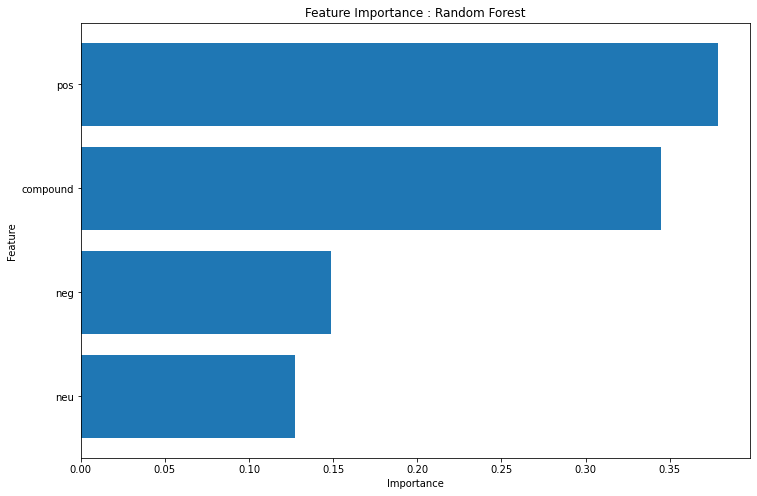

In [205]:
# Plot the variable importance for Random Forest, this will show which variables are playing imp role in RF


import numpy as np

importances = rf_model.feature_importances_
print(importances)
indices = np.argsort(importances) 

plt.figure(figsize=(12,8))
plt.title("Feature Importance : Random Forest")
plt.barh(range(len(importances)),importances[indices],align='center')
plt.yticks(range(len(importances)),[X_train.columns[i] for i in indices])

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Model Analysis

We can see Random Forest is performing best with MSE of 2.0 and Decision Tree with 2.85.
Also, positive score captured from Vader sentiment analysis is most import fetaure to predict Reviewer_score this can be because most of the reviews are skewed having more positive score.

## Model testing using example

We predict the average scores based on the the review left by the customers

### Example 1- using a positive review

In [232]:
example1 = 'Easy access to San Diego main areas. Nice to have good coffee in lobby & brown bag breakfast. Nice staff'

In [233]:
example1_scores= sia.polarity_scores(example1)

In [234]:
example1_scores = pd.DataFrame(example1_scores, index=[0])

In [235]:
rf_pred = rf_model.predict(example1_scores)

In [236]:
print("\nReviewer_score for example 1 using random forest regressor: ", rf_pred)


Reviewer_score for example 1 using random forest regressor:  [8.77382355]


### Example 2- using a negative review

In [237]:
example2 ='my room was dirty and i was afraid to walk,and bathroom tile floor could have been cleaner. Spots/general soiling on the chairs and the tile was dirty, along with hair and dirt in the corners.'

In [238]:
example2_scores = pd.DataFrame(sia.polarity_scores(example2), index=[0])

In [239]:
rf_pred = rf_model.predict(example2_scores)

In [240]:
print("Reviewer_score for example 2 using random forest regressor:", rf_pred)

Reviewer_score for example 2 using random forest regressor: [5.50503333]
